<a href="https://colab.research.google.com/github/siddhi1991/Projects/blob/main/Landuse_OpenStreetMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.1 MB/s eta 0:00:00


In [2]:
import osmnx as ox

In [15]:
city = 'Kansas city, Kansas, USA'

In [16]:
landuse = ox.features_from_place(city, tags={'landuse':True})

In [17]:
print(landuse.head())

                                     geometry addr:state  ele gnis:feature_id  \
element id                                                                      
node    366762349  POINT (-94.87308 39.12258)         KS  305         2509385   
        366762515  POINT (-94.78449 39.12896)         KS  299         2510236   
        366762581  POINT (-94.74091 39.12727)         KS  290         2510827   
        585372301  POINT (-94.64749 39.08227)        NaN  NaN             NaN   
        585372323    POINT (-94.7377 39.0621)        NaN  NaN             NaN   

                       landuse                                         name  \
element id                                                                    
node    366762349  residential  Delaware Highlands Assisted Living Facility   
        366762515  residential                Providence Place Nursing Home   
        366762581  residential        Victory Hills Senior Living Community   
        585372301       quarry       

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

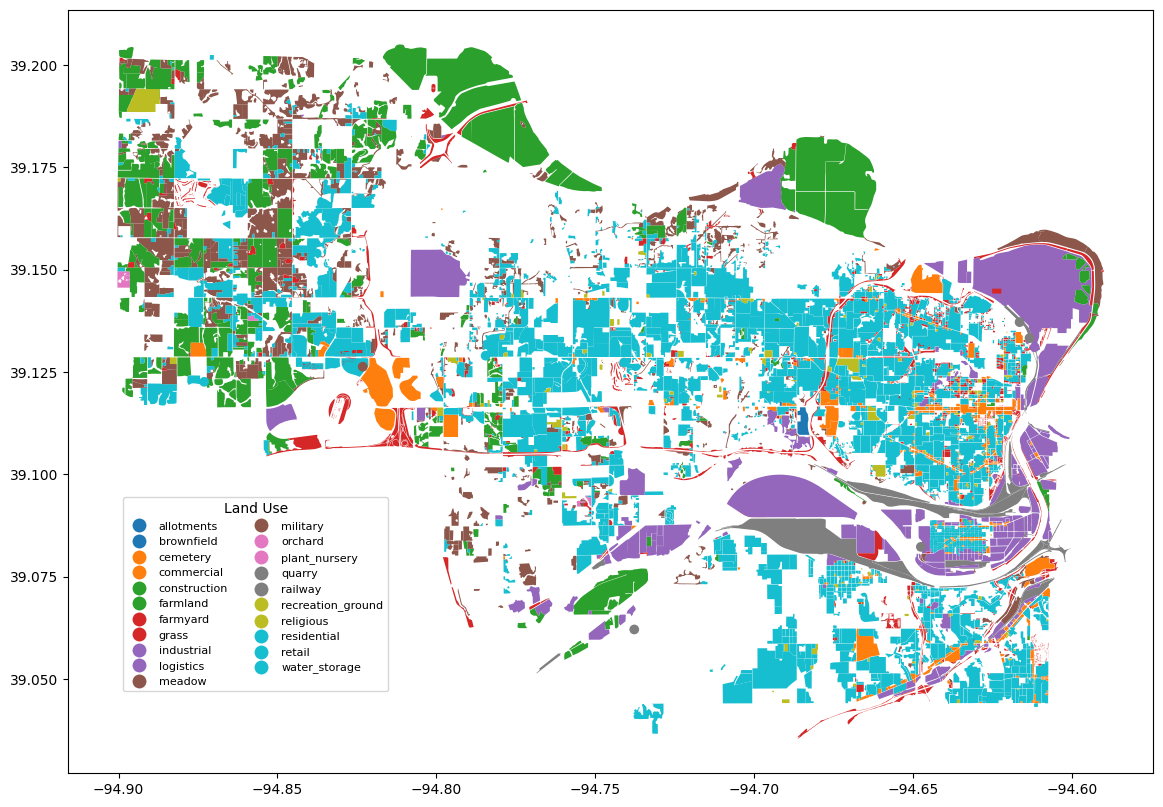

In [39]:
ax = landuse.plot(
    column="landuse",
    figsize=(14, 10),
    legend=True,
    legend_kwds={
        "loc": "lower right",
        "bbox_to_anchor": (0.3, 0.1),
        "ncol": 2,       # number of columns in legend
        "fontsize": 8,
        "title": "Land Use"
    }
)

If I want to extract only the farmland, grass, farmyard and meadow areas and calculate their percentage area out of the total city land cover area.

For computing the area (in km^2), the landuse data should be reprojected **to CRS** i.e., UTM or Web marcator or meters **from GCS** i.e., WGS84 or EPSG:4326 or lat long (degrees)

In [44]:
print(landuse.crs)

epsg:4326


In [45]:
landuse_proj = landuse.to_crs(epsg=3857)

In [46]:
selected_type = ['farmland', 'farmyard', 'meadow', 'grass']
selectedareaproj= landuse_proj[landuse_proj['landuse'].isin(selected_type)]

In [47]:
total_area = landuse_proj.area.sum()
selected_area_total = selectedareaproj.area.sum()

In [49]:
percentage= (selected_area_total/total_area)*100
print(f"Percent farmland coverage in Kansas City is {percentage:.2f}% of the total city area")

Percent farmland coverage in Kansas City is 34.92% of the total city area


/tmp/ipython-input-115850953.py:1: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  ax= selectedareaproj.plot(


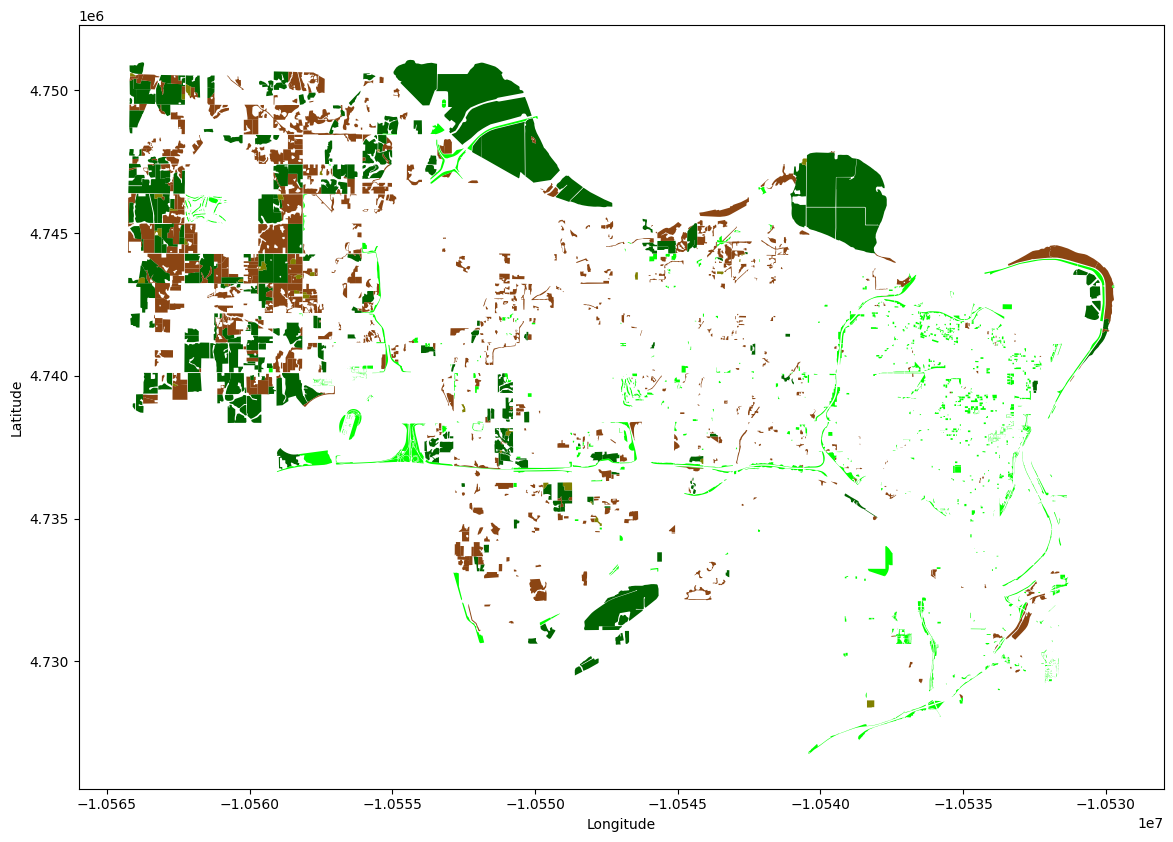

In [61]:
ax= selectedareaproj.plot(
    column = 'landuse',
    color= selectedareaproj['landuse'].map(colors),
    figsize=[14,10],
    legend= True,
    legend_kwds={'title': 'Farmland in Kansas City',
                 'loc':'lower left'}
)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()